In [312]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                            average_precision_score)
import numpy as np 
import pandas as pd
%matplotlib inline
import seaborn as sns #библиотека визуализации данных в Python

2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [313]:
df = pd.read_csv('titanic3.csv', sep =';')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [314]:
df.shape#2

(1310, 14)

In [315]:
df.drop_duplicates() #дубликаты отсуствуют 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,"26,5",0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,"7,8750",NaN,S,NaN,NaN,NaN


In [316]:
df.shape

(1310, 14)

3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

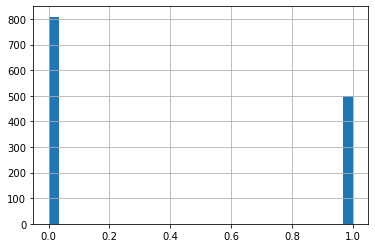

In [317]:
df.survived.hist(bins=30)#классы несбалансированы #3

4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

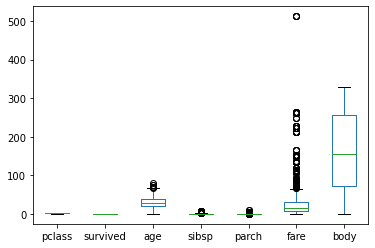

In [318]:
import seaborn as sns
df['age'] = df['age'].replace(",", ".", regex=True) # Заменим запятые на точки, чтобы можно было строки преобразовать в числа
df['fare'] = df['fare'].replace(",", ".", regex=True)
df['age'] = df['age'].astype(float) # Преобразуем строки в числа
df['fare'] = df['fare'].astype(float)
df.plot.box();#4

In [319]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']
categorial:  ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']


In [320]:
#нормализация количественных признаков
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0.0,1.0,"Allen, Miss. Elisabeth Walton",female,0.361169,0.000,0.000000,24160,0.412503,B5,S,2,NaN,"St Louis, MO"
1,0.0,1.0,"Allison, Master. Hudson Trevor",male,0.009395,0.125,0.222222,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0.0,0.0,"Allison, Miss. Helen Loraine",female,0.022964,0.125,0.222222,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,0.373695,0.125,0.222222,113781,0.295806,C22 C26,S,NaN,0.409786,"Montreal, PQ / Chesterville, ON"
4,0.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.311064,0.125,0.222222,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


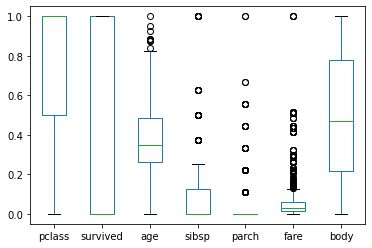

In [321]:
df.plot.box();

5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [322]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df#5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0.0,1.0,21,0,0.361169,0.000,0.000000,187,0.412503,43,2,11,NaN,308
1,0.0,1.0,23,1,0.009395,0.125,0.222222,49,0.295806,79,2,2,NaN,230
2,0.0,0.0,24,0,0.022964,0.125,0.222222,49,0.295806,79,2,27,NaN,230
3,0.0,0.0,25,1,0.373695,0.125,0.222222,49,0.295806,79,2,27,0.409786,230
4,0.0,0.0,26,0,0.311064,0.125,0.222222,49,0.295806,79,2,27,NaN,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1.0,0.0,1292,0,NaN,0.125,0.000000,259,0.028213,186,0,27,NaN,369
1306,1.0,0.0,1293,1,0.329854,0.000,0.000000,250,0.014102,186,0,27,0.926606,369
1307,1.0,0.0,1294,1,0.336117,0.000,0.000000,264,0.014102,186,0,27,NaN,369
1308,1.0,0.0,1295,1,0.361169,0.000,0.000000,346,0.015371,186,2,27,NaN,369


6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

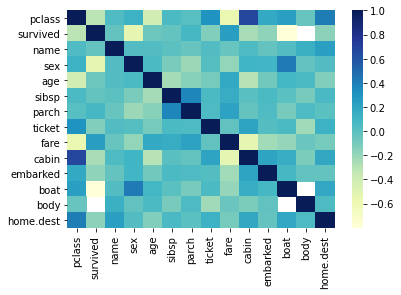

In [323]:
correlation_heatmap = df.corr()
sns.heatmap(correlation_heatmap, cmap = 'YlGnBu', annot=False, fmt='.1f')#6

7.	Заполните пропущенные значения в данных

In [324]:
df.isnull()#7

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1306,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1308,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [325]:
df=df.fillna(0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0.0,1.0,21,0,0.361169,0.000,0.000000,187,0.412503,43,2,11,0.000000,308
1,0.0,1.0,23,1,0.009395,0.125,0.222222,49,0.295806,79,2,2,0.000000,230
2,0.0,0.0,24,0,0.022964,0.125,0.222222,49,0.295806,79,2,27,0.000000,230
3,0.0,0.0,25,1,0.373695,0.125,0.222222,49,0.295806,79,2,27,0.409786,230
4,0.0,0.0,26,0,0.311064,0.125,0.222222,49,0.295806,79,2,27,0.000000,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1.0,0.0,1292,0,0.000000,0.125,0.000000,259,0.028213,186,0,27,0.000000,369
1306,1.0,0.0,1293,1,0.329854,0.000,0.000000,250,0.014102,186,0,27,0.926606,369
1307,1.0,0.0,1294,1,0.336117,0.000,0.000000,264,0.014102,186,0,27,0.000000,369
1308,1.0,0.0,1295,1,0.361169,0.000,0.000000,346,0.015371,186,2,27,0.000000,369


In [326]:
df.count()

pclass       1310
survived     1310
name         1310
sex          1310
age          1310
sibsp        1310
parch        1310
ticket       1310
fare         1310
cabin        1310
embarked     1310
boat         1310
body         1310
home.dest    1310
dtype: int64

8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [327]:
import numpy as np
import sklearn as skl
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

In [328]:
X = df.drop(['survived'], axis=1)#признаки
Y = df['survived']#классы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#обучающиая выборка и тестовые выборки

In [329]:
KNN = KNeighborsClassifier()#K-ближаших соседей(задаётся количество ближайших объектов)

search = GridSearchCV(KNN, {'n_neighbors': range (1,55)})#ищем подходящие параметры кол- во соседей выбираем соседей для точной классификации 
search.fit(X_train, Y_train)#заносим x и y чтобы максимально совпадали

n = search.best_estimator_.n_neighbors#наилучший результат кол - ва соседей

KNN = KNeighborsClassifier(n_neighbors = n)#в классификатор заносим кол-во соседей
KNN.fit(X_train, Y_train)#заносим обучающую выборку
print("Accuracy of KNN model:", accuracy_score(Y_test, KNN.predict(X_test)))
print('Best accuracy:', search.best_score_)


Accuracy of KNN model: 0.6717557251908397
Best accuracy: 0.6608933238298883


In [330]:
DTC = DecisionTreeClassifier()#Логический классификатор (бинарное решающее дерево).

DTC_grid = GridSearchCV(DTC, {'max_depth': list(range(1, 6)), 'max_features': list(range(1, 6))})
DTC_grid.fit (X_train, Y_train)

best_depth = DTC_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTC_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

DTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTC.fit(X_train, Y_train)

accuracy_score = np.mean(Y_test == DTC.predict(X_test))
print("Accuracy of DTC model:",  accuracy_score)
print("Best accuracy:", DTC_grid.best_score_)

Accuracy of DTC model: 0.9669211195928753
Best accuracy: 0.9781955333808504


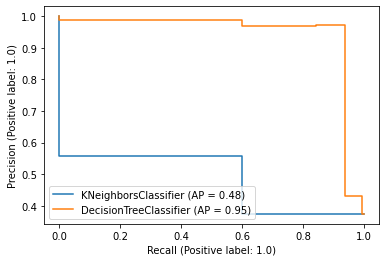

In [331]:
#полнота и точность
i = plot_precision_recall_curve(KNN, X_test, Y_test)
g = plot_precision_recall_curve(DTC, X_test, Y_test, ax = i.ax_)

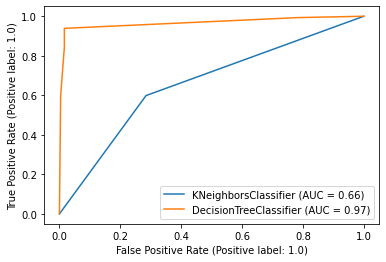

In [332]:
#доля правильных и доля неправильных
i = plot_roc_curve(KNN, X_test, Y_test)
g = plot_roc_curve(DTC, X_test, Y_test, ax = i.ax_)

9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Под кривыми для решающего дерева площадь больше, значит решающее дерево лучше.